In [86]:
import matplotlib.pyplot as plt

### Subdivision method

#### Parse mesh  
OpenFOAM _polyMesh_ directory stores the mesh data  
_points_ file stores the vertices  
_faces_ defines which vertices make up a face  
_owner_ assigns the faces to cells

In [87]:
# get vertices
points = []
with open('points') as f:
    for _ in f:
        if '(\n'==_: break
    for _ in f:
        if ')\n'==_: break
        points.append(tuple(map(float, _.replace('\n','').replace('(','').replace(')','').split(' '))))
print(f'vertices: {len(points)}')
# get faces formed by vertices
# (assuming quads)
faces = []
with open('faces') as f:
    for _ in f:
        if '(\n'==_: break
    for _ in f:
        if ')\n'==_: break
        faces.append(tuple(map(int, _.replace('\n','').replace('4(','').replace(')','').split(' '))))
print(f'faces: {len(faces)}')
# get face owners
owner = []
with open('owner') as f:
    for _ in f:
        if '(\n'==_: break
    for _ in f:
        if ')\n'==_: break
        owner.append(int(_.replace('\n','')))
# form cell
cell = [[] for _ in range(max(owner)+1)]
for i,o in enumerate(owner):
    cell[o].append(faces[i])
for i,f in enumerate(cell):
    l=[]
    for p in f:
        for _ in p:
            # l.append(points[_])
            if not points[_][2]>0: l.append(points[_]) # XY-plane
    cell[i]=(list(set(l)))
print(f'cells: {len(cell)}')
# print(cell[7])

vertices: 242
faces: 420
cells: 100


#### Generate unit grid
reference grid which is used to generate interpolation values

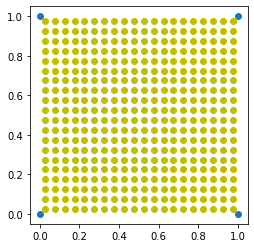

In [88]:
g = [(0,0),(1,0),(0,1),(1,1)] # unit cell
div = 20 # subdivisions
G = [tuple(((x+0.5)/div,(y+0.5)/div)) for x in range(div) for y in range(div)] # unit grid
plt.scatter(*(zip(*G)),color='y'); plt.scatter(*(zip(*g))); plt.axis('scaled'); # scatter plot of grid and cell vertices

#### Inverse interpolation function
find interpolation values for each grid point with respect to the cell vertices  
$
G_j = i_j g_j
$

In [89]:
inv_intp = lambda p,P: tuple(p[_]/sum(__[_] for __ in P) for _ in range(2)) # inv intp function
i = [inv_intp(_,g) for _ in G] # generate intp values
# print(i[7])

#### Map to cells
use interpolation values to map reference grid onto _cells_

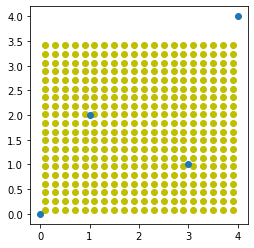

In [90]:
# issues
intp = lambda p,i: tuple(sum([__[_]*i[_] for __ in p]) for _ in range(2)) # generate grid
M = [(0,0),(3,1),(1,2),(4,4)] # test points
G_ = [intp(M,_) for _ in i] # map grid onto new base
plt.scatter(*zip(*G_),color='y'); plt.scatter(*zip(*M)); plt.axis('scaled');

#### Apply condition

#### Generate _alpha_